In [1]:
import pandas as pd, numpy as np

In [2]:
import camelot
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tables = camelot.read_pdf('9329027-UB new sampling.pdf')
tables.export('9329027-UB new sampling.pdf', f='csv', compress = True)

In [4]:
tables[0]

<Table shape=(31, 17)>

In [5]:
tables[0].parsing_report

{'accuracy': -370.65, 'whitespace': 86.91, 'order': 1, 'page': 1}

In [6]:
table1 = camelot.read_pdf('5836337-1500.pdf')

In [7]:
table1[0]

<Table shape=(29, 8)>

In [8]:
table1[0].parsing_report

{'accuracy': 95.32, 'whitespace': 87.07, 'order': 1, 'page': 1}

## PDF to Image

In [9]:
from pdf2image import convert_from_bytes, convert_from_path
from pdf2image.exceptions import(
PDFInfoNotInstalledError, PDFPageCountError, PDFSyntaxError)

In [10]:
png_list = convert_from_path('61606860-UB - new sampling.pdf', dpi=300, output_file = 'ub_sample.png')

## Health Form Parsing - *good for use*

In [11]:
df = table1[0].df
df.iloc[20,0] #

'07\n10\n19\n07\n10\n19\n22\n77280\n26\nA\n  636 00\n1'

In [12]:
table2 = camelot.read_pdf('5840866-1500.pdf')
table2[0]
df2 = table2[0].df
df2.iloc[20,0]

'07\n11\n19\n07\n11\n19\n22\n77014\n26\nA\n  611 00\n1'

In [13]:
df2.head()

,0,1,2,3,4,5,6,7
0,,,,,,,,
1,X,,,FXZ550M82676,,,,
2,"PRICE, TRENA F.",,05\n05\n1964\nX,"PRICE, TRENA F.",,,,
3,213 W US HWY 82,,X,213 W US HWY 82,,,,
4,NEW BOSTON\nTX,,,NEW BOSTON\nTX,,,,


In [14]:
#Name
df2.iloc[2,0]

'PRICE, TRENA F.'

In [15]:
#Birth Date
df2.iloc[2,2].replace('\n','/',2).replace('\nX','')

'05/05/1964'

In [16]:
#Insurance Plan Name
df2.iloc[10,3]

'BC OF ILL INTERPLAN'

In [17]:
#Place of Service
df2.iloc[20,0].split()[6]

'22'

In [18]:
#Date of Service
'/'.join(df2.iloc[20,0].split()[:3])

'07/11/19'

In [19]:
#CPT/HCPCS
df2.iloc[20,0].split()[7]

'77014'

In [20]:
#Modifier
df2.iloc[20,0].split()[8]

'26'

In [21]:
#Units
df2.iloc[20,0].split()[12]

'1'

In [22]:
#Charges
charge = '.'.join(df2.iloc[20,0].split()[10:12])
float(charge)

611.0

## UB Form Parsing

In [23]:
import pytesseract as tess
from PIL import Image

In [24]:
#tess.pytesseract.tesseract_cmd = r'C:\Users\Mack\Anaconda3\pkgs\tessdata'

In [25]:
ub_string = tess.image_to_string(Image.open('9329027-UB new sampling_Page_1.png'))

In [26]:
ub_string

" \n\n‘SOUTHWESTERN REGIONAL MED\n10109 E 79TH ST\n\nTULSA\n8006775545\n\nOK 741334564\n8477469667\n\n   \n\n° SOUTHWESTERN REGIONAL MED\n1480 PAYSPHERE CIRCLE\nCHICAGO\n\n  \n  \n \n\n  \n  \n\n \n \n\nIL 606740148\n\n  \n\n  \n\near #| 9329027\n\nFROM\n\n     \n\nSTATEMENT COVERS PERIOD\nTHROUGH\n\n \n    \n   \n\n \n\n \n\n   \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n  \n\nADMISSION CONDITION CODES 2a AcDT] 90\n10 BIRTHDATE TSEX [12 _ DATE 1SHR 14 TYPE 1sSRO|TCOHRIITSTATT ip 19 20 21 22 a ae 267 oe STATE\n06301939 3 2\n3__ OCCURRENCE 3a__OGCURRENCE OGCURRENGE SPAN % OCCURRENCE SPAN 7\nCODE DATE CODE DATE E FROM THROUGH | CODE FROM THROUGH\n\n \n\n \n\n \n\n \n\n \n\n38\n\n29)\n\n \n\n \n\nVALUE CODES\nAMOUNT,\n\n \n\n \n\n  \n     \n\n \n\n \n\na4\n\nVALUE CODES:\nAMOUNT.\n\n \n\n    \n\n   \n\n \n\n  \n  \n \n\n   \n  \n \n\n   \n  \n \n\n   \n  \n \n\n   \n\n   \n  \n \n\n   \n  \n \n\n      \n \n   \n \n\n  \n\n \n  \n  \n \n  \n 

In [27]:
ub_string = ub_string.replace('\n'," ")

In [28]:
ub_string = ub_string.split(sep="   ")

In [29]:
ub_series = pd.Series(ub_string)
ub_series

0                                                       
1      ‘SOUTHWESTERN REGIONAL MED 10109 E 79TH ST  TU...
2                                                       
3       ° SOUTHWESTERN REGIONAL MED 1480 PAYSPHERE CI...
4                                                       
                             ...                        
245                                                     
246                                                     
247                          NUBC cinscomes: LI0921 2257
248      THE CERTIFICATIONS ON THE REVERSE APPLY TO T...
249                                                    

Length: 250, dtype: object

In [30]:
pd.set_option("display.max_rows", 300)
ub_df = pd.DataFrame(ub_series)

In [31]:
#Patient Name
ub_df.iloc[222,0]  #line 222 contains patient name

'  WEED MEANS,MARILYN M. WEED-MEANS,MARILYN M.  18 18  8CC7D72XE43 YUA800445927'

In [32]:
#Birth date 
ub_df.iloc[43,0]  #line 43 contains dob
dob_pat = re.compile('\d{8}')
found_dob = dob_pat.search(ub_df.iloc[43,0])
dater = found_dob.group(0)
date_format = str(dater[:2] + '/' + dater[2:4] + '/' + dater[4:])
date_format

'06/30/1939'

In [33]:
ub_df.iloc[193,0]

' We AeV.co | 4S DESCRIPTION 7H HOPCS /RATE / HIPPS CODE ASSERV.DATE [46 SERV.UNTS {G7 TOTAL CHARGES {a8 NON-COVERED CHARGES  0300 |LABORATORY OR LAB 36415 070119 34:00  0300 |LABORATORY OR LAB 36415 0741019 34:00  0301 |LAB/CHEMISTRY 80053 070119 333:00  0301 |LAB/CHEMISTRY 80053 0741019 333/00  0301 |LAB/CHEMISTRY 83735 070119 156:00  0305 |LAB/HEMATOLOGY 85025 070119 247:00  0305 |LAB/HEMATOLOGY 85025 0741019 247:00  0333 |RADIATION RX 77387 070219 1673:00  0333 |RADIATION RX 77387 070319 1673:00  0333 |RADIATION RX 77387 070519 1673:00  0333 |RADIATION RX 77387 070819 1673:00  0333 |RADIATION RX 77387 070919 1673:00  0333 |RADIATION RX 77387 071019 1673-00  0333 |RADIATION RX 77387 074119 1673:00  0333 |RADIATION RX 77387 071219 1673:00  0333 |RADIATION RX 77280 070119 3350:00  0333 |RADIATION RX 77336 070219 1168:00  0333 |RADIATION RX 77336 070919 1168:00  0333 |RADIATION RX 77412 070119 1537:00  0333 |RADIATION RX 77412 070219 1537:00  0333 |RADIATION RX 77412 070319 1537:00  03

In [34]:
ub_df

,0
0,
1,‘SOUTHWESTERN REGIONAL MED 10109 E 79TH ST TU...
2,
3,° SOUTHWESTERN REGIONAL MED 1480 PAYSPHERE CI...
4,
5,
6,
7,
8,
9,


In [35]:
ub_df.iloc[43,0]

' ADMISSION CONDITION CODES 2a AcDT] 90 10 BIRTHDATE TSEX [12 _ DATE 1SHR 14 TYPE 1sSRO|TCOHRIITSTATT ip 19 20 21 22 a ae 267 oe STATE 06301939 3 2 3__ OCCURRENCE 3a__OGCURRENCE OGCURRENGE SPAN % OCCURRENCE SPAN 7 CODE DATE CODE DATE E FROM THROUGH | CODE FROM THROUGH'

### Camelot

In [36]:
tables_ub = camelot.read_pdf('9329027-UB new sampling.pdf')
ub_df = tables_ub[0].df
ub_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,(cid:20)(cid:0)(cid:0)(cid:0)(cid:0)(cid:52)(c...,,,,,,,,,,,,,,,,
1,(cid:66)(cid:14) (cid:45)(cid:37)(cid:36)(cid:...,,,,,,,,,,,,,,,,
2,(cid:23)\n(cid:22)(cid:0)(cid:0)(cid:0)(cid:0)...,,,,,,,,,,,,,,,,
3,(cid:24)(cid:0)(cid:48)(cid:33)(cid:52)(cid:41...,,,(cid:25)(cid:0)(cid:48)(cid:33)(cid:52)(cid:41...,,,,,,,,,,,,,
4,"(cid:66)\nWEED MEANS, MARILYN M.",,,(cid:67)\n(cid:66)\n(cid:68)\n(cid:69)\nTULSA\...,,,,,,,,,,,,,
5,(cid:0)\n(cid:33)(cid:36)(cid:45)(cid:41)(cid:...,,,(cid:0)\n(cid:19)(cid:16)\n(cid:35)(cid:47)(ci...,,,,,,,,,,,,,
6,06301939\nF\n3\n2,,,01,,,,,,,,,,,,,
7,(cid:19)(cid:17)\n(cid:19)(cid:18)\n(cid:19)(c...,,,(cid:19)(cid:20)\n(cid:19)(cid:21)\n(cid:19)(c...,,,,,,,,,,,,,
8,(cid:65)\n(cid:65)\n(cid:66)\n(cid:66),,,,,,,,,,,,,,,,
9,(cid:19)(cid:24),,,,,(cid:65) (cid:66) (cid:67) (cid:68),(cid:19)(cid:25)\n(cid:54)(cid:33)(cid:44)(cid...,,,,(cid:20)(cid:16)\n(cid:54)(cid:33)(cid:44)(cid...,,,,(cid:20)(cid:17)\n(cid:54)(cid:33)(cid:44)(cid...,,


In [37]:
import re
cid_pat = r'\(cid:\d+\)'

In [38]:
ub_df.iloc[0,0]

'(cid:20)(cid:0)(cid:0)(cid:0)(cid:0)(cid:52)(cid:57)(cid:48)(cid:37)\n(cid:19)(cid:65)(cid:0)(cid:48)(cid:33)(cid:52)(cid:14)\n(cid:17)\n(cid:18)(cid:0)(cid:0)(cid:0)\n(cid:47)(cid:38)(cid:0)(cid:34)(cid:41)(cid:44)(cid:44)\nSOUTHWESTERN REGIONAL MED\nSOUTHWESTERN REGIONAL MED\n9329027\n(cid:35)(cid:46)(cid:52)(cid:44)(cid:0)(cid:3)'

In [39]:
ub_df.columns = ["column1","column2","column3","column4","column5","column6",
                 "column7","column8","column9","column10","column11",
                 "column12","column13","column14","column15","column16",
                 "column17"]

In [40]:
ub_df['column1'] = [re.sub(cid_pat, '', i) for i in ub_df.column1]
ub_df['column1'] = [i.replace('\n','') for i in ub_df.column1]

In [41]:
ub_df.column1

0     SOUTHWESTERN REGIONAL MEDSOUTHWESTERN REGIONAL...
1        10109 E 79TH ST1480 PAYSPHERE CIRCLE2165130131
2       TULSAOK 741334564CHICAGOIL606740148800677554...
3                                                      
4                                WEED MEANS, MARILYN M.
5                                                      
6                                           06301939F32
7                                                      
8                                                      
9                                                      
10                                                     
11                                                     
12    0300030003010301030103050305033303330333033303...
13                                                     
14                                                     
15             MEDICAREYY         BC OK PLANYY         
16                                                     
17    WEED MEANS,MARILYN M.188CC7D72XE43WEED-MEA

In [42]:
tables_ub

<TableList n=1>

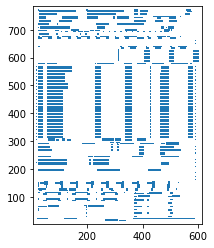

<Figure size 1440x1152 with 0 Axes>

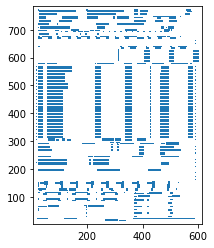

In [43]:
#don't use .show() on the end of the plot
plt.figure(figsize =(20, 16))
camelot.plot(tables_ub[0], kind='text')

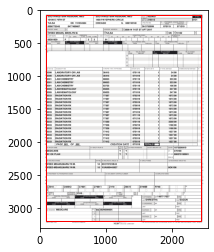

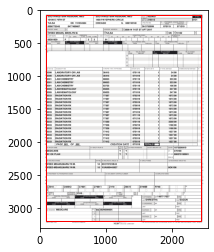

In [44]:
camelot.plot(tables[0], kind='contour')

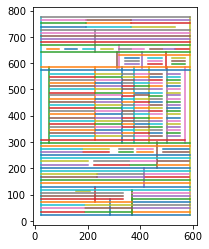

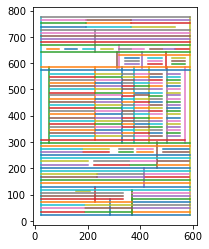

In [45]:
camelot.plot(tables[0], kind='line')

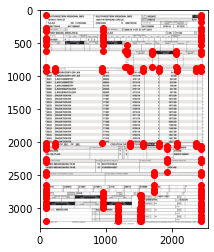

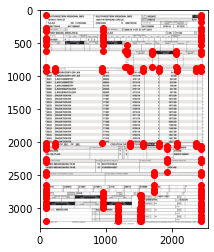

In [46]:
camelot.plot(tables[0], kind='joint')

## Extracting key areas

In [47]:
#table area string is (x1,y1) top left corner | (x2,y2) bottom right corner
tables_ub_ex = camelot.read_pdf('9329027-UB new sampling.pdf', flavor='stream', 
                                table_areas=['25,575,566,337'])
tables_ub_ex[0].df
ub_test = tables_ub_ex[0].df

In [48]:
# add Non Covered Charges Column, adjusted x2 parameter
tables_ub2_ex = camelot.read_pdf('9329027-UB new sampling.pdf', flavor='stream', 
                                table_areas=['25,575,588,337'])
tables_ub2_ex[0].df

,0,1,2,3,4,5
0,0300,LABORATORY OR LAB,36415,070119,1,34 00
1,0300,LABORATORY OR LAB,36415,071019,1,34 00
2,0301,LAB/CHEMISTRY,80053,070119,1,333 00
3,0301,LAB/CHEMISTRY,80053,071019,1,333 00
4,0301,LAB/CHEMISTRY,83735,070119,1,156 00
5,0305,LAB/HEMATOLOGY,85025,070119,1,247 00
6,0305,LAB/HEMATOLOGY,85025,071019,1,247 00
7,0333,RADIATION RX,77387,070219,1,1673 00
8,0333,RADIATION RX,77387,070319,1,1673 00
9,0333,RADIATION RX,77387,070519,1,1673 00


In [49]:
#Cleaning - 
#1, Rename columns, reformat date string Col3, format price string Col 5

ub_test.columns = ['revco','description','hcpcs','serv_date','units','charges'] #rename

# needs an if statement for length, bc some forms have date pre formatted 
ub_test.serv_date = [(i[:2] + '/' + i[2:4] + '/20' + i[4:]) for i in ub_test['serv_date']] # date
ub_test.charges = [float(i.replace(' ','.')) for i in ub_test['charges']] #charges

In [50]:

ub_test

,revco,description,hcpcs,serv_date,units,charges
0,0300,LABORATORY OR LAB,36415,07/01/2019,1,34.0
1,0300,LABORATORY OR LAB,36415,07/10/2019,1,34.0
2,0301,LAB/CHEMISTRY,80053,07/01/2019,1,333.0
3,0301,LAB/CHEMISTRY,80053,07/10/2019,1,333.0
4,0301,LAB/CHEMISTRY,83735,07/01/2019,1,156.0
5,0305,LAB/HEMATOLOGY,85025,07/01/2019,1,247.0
6,0305,LAB/HEMATOLOGY,85025,07/10/2019,1,247.0
7,0333,RADIATION RX,77387,07/02/2019,1,1673.0
8,0333,RADIATION RX,77387,07/03/2019,1,1673.0
9,0333,RADIATION RX,77387,07/05/2019,1,1673.0


# TEST UB forms 1 - Camelot
### get description, dcpcs, serv date, units, charges info

In [51]:
# service date, HCPCS, Units, Total Charges, Non-covered chares
filename = 'Behrmann, Timothy 906673931_UB.pdf'
new_ub1 = camelot.read_pdf(filename, 
                           flavor='stream', table_areas=['30,575,575,337'])

new_ub1_test = new_ub1[0].df

new_ub1_test.columns = ['description','hcpcs','serv_date','units','charges'] #rename
new_ub1_test['charges'] = [float(i.replace(' ','.')) for i in new_ub1_test.charges]
new_ub1_test

,description,hcpcs,serv_date,units,charges
0,Pharmacy-General,,04/20/2020,1,141.0
1,N463323026929ML60.000000,J2704,04/20/2020,60,198.0
2,N463323026929ML100.000000,J2704,04/17/2020,100,330.0
3,N463323026929ML60.000000,J2704,04/15/2020,60,198.0
4,N463323026929ML60.000000,J2704,04/13/2020,60,198.0
5,N463323026929ML60.000000,J2704,04/10/2020,60,198.0
6,N436000001225ML2.000000,J2405,04/10/2020,4,8.0
7,N463323026929ML60.000000,J2704,04/08/2020,60,198.0
8,N463323026929ML60.000000,J2704,04/07/2020,60,198.0
9,N463323026929ML60.000000,J2704,04/06/2020,60,198.0


In [52]:
# for i in range(len(new_ub1_test)):
#     if len(new_ub1_test.iloc[i,0]) > 4:
#         new_ub1_test.iloc[i,0] = new_ub1_test.iloc[i,0][2:]
#     else:
#         pass
# new_ub1_test

### Get filename

In [120]:
# actual filename will come from os parsing

new_ub1_test['filename'] = filename
new_ub1_test

,patient,birthdate,payer,DX,description,hcpcs,serv_date,units,charges,filename
0,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",Pharmacy-General,,04/20/2020,1,141.0,"Behrmann, Timothy 906673931_UB.pdf"
1,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/20/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
2,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML100.000000,J2704,04/17/2020,100,330.0,"Behrmann, Timothy 906673931_UB.pdf"
3,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/15/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
4,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/13/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
5,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/10/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
6,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N436000001225ML2.000000,J2405,04/10/2020,4,8.0,"Behrmann, Timothy 906673931_UB.pdf"
7,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/08/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
8,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/07/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
9,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/06/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"


### Get DX section

In [54]:
# DX portion of form
new_ub1_dx = camelot.read_pdf('Behrmann, Timothy 906673931_UB.pdf', 
                           flavor='stream', table_areas=['23,145,575,135'])
new_ub1_dx[0].df
new_ub1_dx[0].df.columns = ['A','B','C','D','E','F','G','H','I']
row_list = []
for index, rows in new_ub1_dx[0].df.iterrows():
    lister = [rows.A, rows.B, rows.C, rows.D, rows.E, rows.F, 
              rows.G, rows.H, rows.I]
    row_list.extend(lister)
row_list = list(set(row_list))
row_list.remove('')
new_ub1_test['DX'] = pd.Series([],dtype=str)

### Patient name

In [55]:
#patient name
new_ub1_patient = camelot.read_pdf('Behrmann, Timothy 906673931_UB.pdf', 
                           flavor='stream', table_areas=['23,800,65,550'])

new_ub1_patient[0].df

new_ub1_patient = new_ub1_patient[0].df

new_ub1_test['patient'] = new_ub1_patient.iloc[3,1].replace('b ','')
new_ub1_test['birthdate'] = new_ub1_patient.iloc[5,0]

In [56]:
new_ub1_test

,description,hcpcs,serv_date,units,charges,filename,DX,patient,birthdate
0,Pharmacy-General,,04/20/2020,1,141.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
1,N463323026929ML60.000000,J2704,04/20/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
2,N463323026929ML100.000000,J2704,04/17/2020,100,330.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
3,N463323026929ML60.000000,J2704,04/15/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
4,N463323026929ML60.000000,J2704,04/13/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
5,N463323026929ML60.000000,J2704,04/10/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
6,N436000001225ML2.000000,J2405,04/10/2020,4,8.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
7,N463323026929ML60.000000,J2704,04/08/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
8,N463323026929ML60.000000,J2704,04/07/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999
9,N463323026929ML60.000000,J2704,04/06/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf",NaN,"BEHRMANN, TIMOTHY",01/12/1999


In [57]:
new_ub1_payer = camelot.read_pdf('Behrmann, Timothy 906673931_UB.pdf', 
                           flavor='stream', table_areas=['23,290,200,225'])

new_ub1_payer= new_ub1_payer[0].df

new_ub1_test['payer'] = new_ub1_payer.iloc[0,0]

In [58]:
#Reorganize columns and insert DX values list
new_ub1_test.columns
new_ub1_test = new_ub1_test[['patient', 'birthdate', 'payer','DX','description', 'hcpcs', 
'serv_date', 'units', 'charges', 'filename']]
for i in range(len(new_ub1_test)):
    new_ub1_test.iloc[i,3] = str(row_list)

In [59]:
new_ub1_test

,patient,birthdate,payer,DX,description,hcpcs,serv_date,units,charges,filename
0,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",Pharmacy-General,,04/20/2020,1,141.0,"Behrmann, Timothy 906673931_UB.pdf"
1,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/20/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
2,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML100.000000,J2704,04/17/2020,100,330.0,"Behrmann, Timothy 906673931_UB.pdf"
3,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/15/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
4,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/13/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
5,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/10/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
6,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N436000001225ML2.000000,J2405,04/10/2020,4,8.0,"Behrmann, Timothy 906673931_UB.pdf"
7,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/08/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
8,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/07/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
9,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/06/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"


In [60]:
new_ub1_test

,patient,birthdate,payer,DX,description,hcpcs,serv_date,units,charges,filename
0,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",Pharmacy-General,,04/20/2020,1,141.0,"Behrmann, Timothy 906673931_UB.pdf"
1,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/20/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
2,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML100.000000,J2704,04/17/2020,100,330.0,"Behrmann, Timothy 906673931_UB.pdf"
3,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/15/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
4,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/13/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
5,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/10/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
6,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N436000001225ML2.000000,J2405,04/10/2020,4,8.0,"Behrmann, Timothy 906673931_UB.pdf"
7,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/08/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
8,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/07/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"
9,"BEHRMANN, TIMOTHY",01/12/1999,BCBS BLUECARE HMO 156Z,"['D233', 'P497', 'D417', 'L497', 'V597', 'M498...",N463323026929ML60.000000,J2704,04/06/2020,60,198.0,"Behrmann, Timothy 906673931_UB.pdf"


# TEST UB forms 2- Scanned Image

In [61]:
import numpy as np
import cv2 as cv
import pytesseract as pyt
from PIL import Image
img = cv.imread('Bonilla, Martha J 907023423UB.png')
img1 = cv.imread('Bonilla, Martha J 907023423UB.png')
img2 = cv.imread('Hall, Jeffrey W 906361759 1UB.png')
img3 = cv.imread('Belgie, Richard Alan 906361788 1.png')


In [62]:
#filesize
width, height = Image.open('Bonilla, Martha J 907023423UB.png').size
print(width, height)

2652 3433


In [63]:
print(img.size)

27312948


### Patient Name

In [64]:
#Martha
pat_name = pyt.image_to_string(img[360:400,60:600]).split('\n')
pat_name.remove('\x0c')
pat_name[0]

'BONILLA, MARTHA'

In [65]:
#Patient2 Name
pat2_name = pyt.image_to_string(img2[360:400,60:600]).split('\n')
pat2_name.remove('\x0c')
pat2_name[0]

'HALL, JEFFREY W.'

In [66]:
pat3_name = pyt.image_to_string(img3[360:400,60:600]).split('\n')
pat3_name.remove('\x0c')
pat3_name[0]

'BELGIE, RICHARD A'

### Birthdate

In [67]:
pat_name = pyt.image_to_string(img[450:500,60:300]).split('\n')
pat_name.remove('\x0c')
pat_name[0]

'02181949'

In [68]:
pat2_name = pyt.image_to_string(img2[450:500,60:300]).split('\n')
pat2_name.remove('\x0c')
pat2_name[0]

'09171962'

In [69]:
pat3_name = pyt.image_to_string(img3[450:500,60:300]).split('\n')
pat3_name.remove('\x0c')
pat3_name[0]

'03301950'

### Payer

In [70]:
payer_name = pyt.image_to_string(img[2150:2300,60:620]).split('\n')
payer_name.remove('\x0c')
payer_name
try:
    for i in range(len(payer_name)):
        payer_name.remove('')
        payer_name.remove(' ')
except:
    pass
payer_name

['BCBS MYBLUE']

In [71]:
#y1:y2,x1:x2
payer2_name = pyt.image_to_string(img2[2150:2300,60:620]).split('\n')
payer2_name.remove('\x0c')
payer2_name
try:
    for i in range(len(payer2_name)):
        payer2_name.remove('')
        payer2_name.remove(' ')
except:
    pass
payer2_name

['BCBS PPCPPSPHS']

In [72]:
payer3_name = pyt.image_to_string(img3[2150:2300,60:620]).split('\n')
payer3_name.remove('\x0c')
payer3_name
try:
    for i in range(len(payer3_name)):
        payer3_name.remove('')
        payer3_name.remove(' ')
except:
    pass
payer3_name

['HUMANA MEDICARE HMO']

### DX

In [73]:
# #contrast for 2's and Z's
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# adaptiveThresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, 12)
# config = '-l eng --oem 1 --psm 3'
# text = pyt.image_to_string(adaptiveThresh, config = config)


In [74]:
pat1_dx = pyt.image_to_string(img[2700:2800,60:2100]).split('\n')
pat1_dx.remove('\x0c')
pat1_dx
for i in range(100):
    if '' in pat1_dx:
        pat1_dx.remove('')
    elif ' ' in pat1_dx:
        pat1_dx.remove(' ')
    else:
        pass
pat1_dx

['1251.0', 'C7931', 'M1990', 'F17210', '28042']

In [75]:
'' in pat1_dx

False

In [76]:
cat = ['fur','','','meow','','paws', " "]

In [77]:
# All instances remover
try:
    for i in range(len(cat)):
        cat.remove('')
except:
    pass

## Elixr Test

In [78]:
#y1:y2,x1:x2
img5 = cv.imread('elixr.png')
image5 = Image.open('elixr.png')
print(image5.size)
width, height = image5.size
elix_name = pyt.image_to_string(img5[405:528,40:561])
elix_name

(600, 600)


' \n\x0c'

In [79]:
elix_img = cv.imread('elixr.png')
bnw_image = cv.cvtColor(elix_img, cv.COLOR_BGR2GRAY)
(thresh, blackandWhiteImage) = cv.threshold(bnw_image, 127, 255, cv.THRESH_BINARY)
cv.imshow('Black and White', blackandWhiteImage)
cv.imshow('orig',elix_img)
cv.imshow('Gray image', bnw_image)

cv.waitKey(0)
cv.destroyAllWindows()


In [80]:
#cv.imshow('orig',elix_img)

In [81]:
thresh

127.0

In [82]:
pyt.image_to_string(blackandWhiteImage)

'ELIXR\n\x0c'

In [83]:
pyt.image_to_string(blackandWhiteImage)

'ELIXR\n\x0c'

In [84]:
pyt.image_to_boxes(blackandWhiteImage)

'E 52 79 149 183 0\nL 158 79 253 184 0\nI 265 79 308 186 0\nX 319 78 436 186 0\nR 441 79 547 185 0\n'

In [85]:
pyt.image_to_data(blackandWhiteImage)

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t600\t600\t-1\t\n2\t1\t1\t0\t0\t0\t52\t414\t495\t108\t-1\t\n3\t1\t1\t1\t0\t0\t52\t414\t495\t108\t-1\t\n4\t1\t1\t1\t1\t0\t52\t414\t495\t108\t-1\t\n5\t1\t1\t1\t1\t1\t52\t414\t495\t108\t81\tELIXR\n'

ELIXR



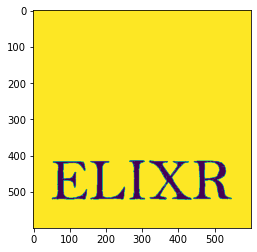

In [86]:
import matplotlib.pyplot as plt
h, w, _ = img.shape
boxes = pyt.image_to_boxes(blackandWhiteImage)
print(pyt.image_to_string(blackandWhiteImage))
for b in boxes.splitlines():
    b = b.split()
    cv.rectangle(blackandWhiteImage, ((int(b[1]), h - int(b[2]))), 
                  ((int(b[3]), h - int(b[4]))), (0, 255, 0), 2)
    plt.imshow(blackandWhiteImage)

In [87]:
# box coordinates [y1:y2, x1;x2]
# previous coor 400:550, 50:550
# from boxes \t52\t414\t495\t108\t81



In [88]:
pyt.image_to_string(blackandWhiteImage).replace('\n\x0c','')

'ELIXR'

In [89]:
#t52\t414\t495\t108
x, y, w, h = 52, 414, 495, 108
# ROI = int(thresh)[y:y+h,x:x+w]
# print(pyt.image_to_string(ROI, lang='eng', config='--psm 6'))
print(pyt.image_to_string(blackandWhiteImage[y:y+h,x:x+w]).replace('\n\x0c',''))

In [90]:
pyt.image_to_string(blackandWhiteImage)

'ELIXR\n\x0c'

In [91]:
#Trial 3
thresh1 = 255 - cv.threshold(blackandWhiteImage, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
ROI = thresh1[y:y+h,x:x+w]
data = pyt.image_to_string(ROI, lang='eng',config='--psm 6')
print(data)

cv.imshow('thresh', thresh1)
cv.imshow('ROI', ROI)
cv.waitKey()

KLIXR



-1

## OS Search

In [113]:
import os
form_dir = 'C:/Users/Mack/Documents/RCCS Docs/UB_Forms'
dir_list = os.listdir(form_dir)

In [114]:
# test_path = "C:\Users\Mack\Documents\RCCS Docs\UB_Forms"
# '/'.join('C:\Users\Mack\Documents\RCCS Docs\UB_Forms'.split('\\'))

In [115]:
dir_list

['Behrmann, Timothy 906673931_UB.pdf',
 'Belgie, Richard Alan 906361788 1.pdf',
 'Belgie, Richard Alan 906361788 2.pdf',
 'Belgie, Richard Alan 906361788 3.pdf',
 'Belgie, Richard Alan 906361788 4.pdf',
 'Belgie, Richard Alan 906361788 5.pdf',
 'Bonilla, Martha J 907023423UB.pdf',
 'Castro, Karina 1008280010 1.pdf',
 'Castro, Karina 1008280010 2.pdf',
 'Castro, Karina 1008280010 3.pdf',
 'Castro, Karina 1008718340UB.pdf',
 'Castro, Karina 906170154 2UB.pdf',
 'Castro, Karina 906170154UB 1.pdf',
 'Castro, Karina 906170154UB 2.pdf',
 'Castro, Karina 906170154UB 3.pdf',
 'Coloma, Eduardo A 906475641.pdf',
 'DosReisRamos, Morela 906037624 1 1.pdf',
 'DosReisRamos, Morela 906037624 1 2.pdf',
 'DosReisRamos, Morela 906037624 2.pdf',
 'DosReisRamos, Morela 906037624 3 1.pdf',
 'DosReisRamos, Morela 906037624 3 2.pdf',
 'Hall, Jeffrey W 906361759 1UB.pdf',
 'Hall, Jeffrey W 906361759 2UB.pdf',
 'Mendes, Brandon 1008564944UB.pdf',
 'Mendes, Brandon 1008603441UB.pdf',
 'Mendes, Brandon 100861322

In [119]:
belg = dir_list[3]
test_path = form_dir + '/'+ belg
image = convert_from_path(test_path,single_file = True, first_page= 1,
                          last_page =1)
image[0].save(str(test_path)+'.png', 'PNG')

## Image resize

In [96]:
test_doc = Image.open('Bonilla, Martha J 907023423UB.png')
width, height = Image.open('Bonilla, Martha J 907023423UB.png').size
new_size = (int(width/4),int(height/4))
resized = test_doc.resize(new_size)
resized.size

(663, 858)

In [97]:
test_doc.show('test doc')
resized.show('resized')

In [98]:
Image.open('Bonilla, Martha J 907023423UB.png').size

(2652, 3433)

## Tkinter bounding box

In [100]:
from tkinter import *
from PIL import Image, ImageTk

# root = Tk()

# #scrollbar
# scrollbar = Scrollbar(root)
# scrollbar.pack( side = RIGHT, fill = Y )

# # mylist = Listbox(root, yscrollcommand = scrollbar.set )
# # for line in range(100):
# #    mylist.insert(END, "This is line number " + str(line))

# # mylist.pack( side = LEFT, fill = BOTH )
# # scrollbar.config( command = mylist.yview )

# canvas = Canvas(width= 2550, height = 3300, bg='white',yscrollcommand= scrollbar.set )
# canvas.pack(side = LEFT, fill= BOTH)
# scrollbar.config(command= canvas.yview)

# #image = Image.open(img1)
# photo = ImageTk.PhotoImage(img1)
# #photo_img = PhotoImage(file = 'Bonilla, Martha J 907023423UB.png')
# canvas.create_image(0, 0, image = photo, anchor='nw')
# canvas.config(scrollregion=canvas.bbox(tkinter.ALL))


# root.mainloop()

In [ ]:
# import tkinter

# class ScrollableImage(tkinter.Frame):
#     def __init__(self, master=None, **kw):
#         self.image = kw.pop('image', None)
#         sw = kw.pop('scrollbarwidth', 10)
#         super(ScrollableImage, self).__init__(master=master, **kw)
#         self.cnvs = tkinter.Canvas(self, highlightthickness=0, **kw)
#         self.cnvs.create_image(0, 0, anchor='nw', image=self.image)
#         # Vertical and Horizontal scrollbars
#         self.v_scroll = tkinter.Scrollbar(self, orient='vertical', width=sw)
#         self.h_scroll = tkinter.Scrollbar(self, orient='horizontal', width=sw)
#         # Grid and configure weight.
#         self.cnvs.grid(row=0, column=0,  sticky='nsew')
#         self.h_scroll.grid(row=1, column=0, sticky='ew')
#         self.v_scroll.grid(row=0, column=1, sticky='ns')
#         self.rowconfigure(0, weight=1)
#         self.columnconfigure(0, weight=1)
#         # Set the scrollbars to the canvas
#         self.cnvs.config(xscrollcommand=self.h_scroll.set, 
#                            yscrollcommand=self.v_scroll.set)
#         # Set canvas view to the scrollbars
#         self.v_scroll.config(command=self.cnvs.yview)
#         self.h_scroll.config(command=self.cnvs.xview)
#         # Assign the region to be scrolled 
#         self.cnvs.config(scrollregion=self.cnvs.bbox('all'))
#         self.cnvs.bind_class(self.cnvs, "<MouseWheel>", self.mouse_scroll)

#     def mouse_scroll(self, evt):
#         if evt.state == 0 :
#             self.cnvs.yview_scroll(-1*(evt.delta), 'units') # For MacOS
#             self.cnvs.yview_scroll(int(-1*(evt.delta/120)), 'units') # For windows
#         if evt.state == 1:
#             self.cnvs.xview_scroll(-1*(evt.delta), 'units') # For MacOS
#             self.cnvs.xview_scroll(int(-1*(evt.delta/120)), 'units') # For windows

In [ ]:
# import tkinter as tk
# #import ScrollableImage
# root = tk.Tk()
# img= tk.PhotoImage(file="Bonilla, Martha J 907023423UB.png")
# image_window = ScrollableImage(root,image =img,scrollbarwidth= 6, width=800, height=1000)
# image_window.pack()
# root.mainloop()